In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings 
warnings.filterwarnings('ignore')


In [3]:
pd.set_option("display.max_columns", None)

In [5]:
df = pd.read_csv('/Users/samalainabayeva/Documents/Omdena/Omdena-Phoenix Sample Data.csv', encoding='latin1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56289 entries, 0 to 56288
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   City of incident                          43668 non-null  object 
 1   State of incident                         51948 non-null  object 
 2   Type of Injury                            35605 non-null  object 
 3   Serious Injury                            10513 non-null  object 
 4   Other injury                              6 non-null      object 
 5   Age at time of Injury                     62 non-null     float64
 6   Did the airbags deploy?                   23558 non-null  object 
 7   What type of accident was it?             24595 non-null  object 
 8   Did the accident involve a truck or bus?  24958 non-null  object 
 9   Type of Truck                             526 non-null    object 
 10  Involve Uber/Taxi/Car Service?    

US vs Canada Data

Data must be from the US to avoid differences in cost and laws

Start with standard medical bills besides workers compensation, 
- medical codes
- procedures
- Where is this Data?
- How can we gain an understanding of the costs/codes/and source of data
- GitHub and Kaggle Data Sets
- Official US Websites 

### We will have to figure these things out ourselves!
##### Google Searches

- Look at research papers in the domain
- Consider all personal injuries NOT JUST CAR ACCIDENTS
- Data Scarcity is a concern

### Majority of the work is going to be wrangling data
- What do we want to extract from the data that we find, use domain research papers for guidance

- Vivek says simplify the problem where we have a US dataset, which are the types of injury with the maximum claims

In [6]:
df.head()

,City of incident,State of incident,Type of Injury,Serious Injury,Other injury,Age at time of Injury,Did the airbags deploy?,What type of accident was it?,Did the accident involve a truck or bus?,Type of Truck,Involve Uber/Taxi/Car Service?,Potential TBI Issues,State of Injury,Catastrophic?,Called 911?,Net Attorney Fee,Total Bills,Total Coverage,Positive MRI Finding,Life Care Plan Status,Ortho/Pain/Neuro Eval,Surgery Completed,Surgery and/or Injections Recommended,Similar Prior Injury,Injections Completed,No Treatment Reason,TBI Confirmed,AGE
0,New Smyrna Beach,FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1152.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,65.0
1,Coral Springs,FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2499.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39.0
2,Lehigh Acres,FL,Other Injury / Pain,NaN,NaN,NaN,Yes,Multi Car,No,NaN,No,No,NaN,0,Yes,16666.67,30603.62,50000.0,Yes,Yes,Yes,NaN,No,No,NaN,NaN,0,41.0
3,Belleview,FL,Other Injury / Pain,NaN,NaN,NaN,Yes,Multi Car,Yes,Semi-tractor with trailer,No,NaN,NaN,0,Yes,9833.33,24253.94,3000000.0,Yes,No,No,No,No,No,No,Pain free,0,54.0
4,NaN,FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,610.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,61.0


In [39]:
df.describe()

,Age at time of Injury,Catastrophic?,Net Attorney Fee,Total Bills,Total Coverage,TBI Confirmed,AGE
count,62.000000,56289.000000,5.628500e+04,3.203400e+04,2.739900e+04,56289.000000,50075.000000
mean,36.354839,0.063725,1.204521e+04,2.911994e+04,5.800887e+05,0.000107,47.220869
std,29.258092,0.244264,7.288354e+04,7.334635e+04,1.556120e+07,0.010324,17.089983
min,2.000000,0.000000,-1.141620e+04,0.000000e+00,-2.000000e+00,0.000000,-952.000000
25%,12.250000,0.000000,1.875000e+03,5.608722e+03,2.000000e+04,0.000000,35.000000
50%,20.500000,0.000000,4.000000e+03,1.488114e+04,5.000000e+04,0.000000,48.000000
75%,63.000000,0.000000,1.000000e+04,2.868633e+04,1.250000e+05,0.000000,59.000000
max,93.000000,1.000000,9.250000e+06,4.763425e+06,1.000010e+09,1.000000,321.000000


In [32]:
# Lots of Values to Clean Up in states
df["State of Injury"].value_counts().shape

(38,)

In [35]:
# Will likely have to use the codes to gain specific knowledge about the injuries
df["Type of Injury"].value_counts()

Type of Injury
Other Injury / Pain                                                                                                                  22912
Other Injury / Pain; Broken Bones - minor body part                                                                                    994
Other Injury / Pain; Herniated/Bulging/Ruptured Disc                                                                                   958
Other Injury / Pain; Traumatic  Brain  Injury                                                                                          914
Other Injury / Pain; Tendon/Ligament Tear/Rupture                                                                                      889
                                                                                                                                     ...  
Other Injury / Pain; Brief Loss of Consciousness; Herniated/Bulging/Ruptured Disc                                                        1
Other Injury

In [41]:
df[df["AGE"] == df["AGE"].min()]

,City of incident,State of incident,Type of Injury,Serious Injury,Other injury,Age at time of Injury,Did the airbags deploy?,What type of accident was it?,Did the accident involve a truck or bus?,Type of Truck,Involve Uber/Taxi/Car Service?,Potential TBI Issues,State of Injury,Catastrophic?,Called 911?,Net Attorney Fee,Total Bills,Total Coverage,Positive MRI Finding,Life Care Plan Status,Ortho/Pain/Neuro Eval,Surgery Completed,Surgery and/or Injections Recommended,Similar Prior Injury,Injections Completed,No Treatment Reason,TBI Confirmed,AGE
2411,Orlando,FL,Other Injury / Pain,NaN,NaN,NaN,Yes,Multi Car,No,NaN,No,No,NaN,0,Yes,2000.0,14408.83,10000.0,No,NaN,No,NaN,NaN,No,NaN,NaN,0,-952.0


In [38]:
df[df["Total Coverage"] == df["Total Coverage"].max()]

,City of incident,State of incident,Type of Injury,Serious Injury,Other injury,Age at time of Injury,Did the airbags deploy?,What type of accident was it?,Did the accident involve a truck or bus?,Type of Truck,Involve Uber/Taxi/Car Service?,Potential TBI Issues,State of Injury,Catastrophic?,Called 911?,Net Attorney Fee,Total Bills,Total Coverage,Positive MRI Finding,Life Care Plan Status,Ortho/Pain/Neuro Eval,Surgery Completed,Surgery and/or Injections Recommended,Similar Prior Injury,Injections Completed,No Treatment Reason,TBI Confirmed,AGE
32738,Orlando,FL,Other Injury / Pain; Traumatic Brain Injury.,No,NaN,NaN,No,Multi Car,No,NaN,No,Yes,NaN,0,Yes,25000.00,26667.94,1.000010e+09,Yes,NaN,Yes,No,No,No,No,Medically unable,0,64.0
35062,Leesburg,FL,Other Injury / Pain; Traumatic Brain Injury.,NaN,NaN,NaN,No,Multi Car,No,NaN,No,Yes,NaN,0,Yes,3333.33,20192.17,1.000010e+09,Yes,NaN,Yes,No,Yes,No,No,Pain free,0,26.0


# Visualizing Numeric Distributions

<Axes: >

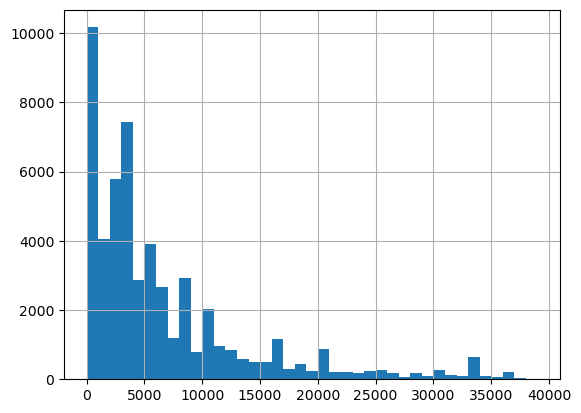

In [15]:
df[df["Net Attorney Fee"] < df["Net Attorney Fee"].quantile(.95)]["Net Attorney Fee"].hist(bins=np.arange(0, 4e4, 1000));

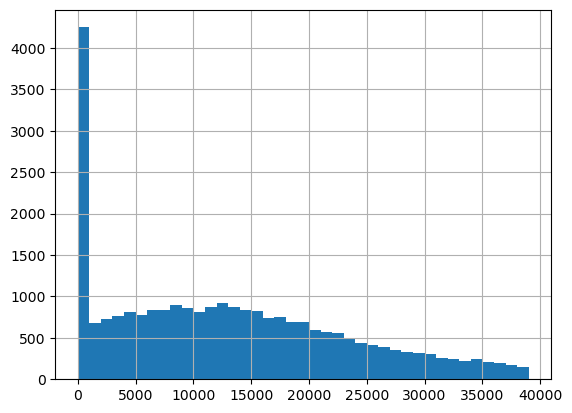

In [18]:
df[df["Net Attorney Fee"] < df["Net Attorney Fee"].quantile(.95)]["Total Bills"].hist(bins=np.arange(0, 4e4, 1000));

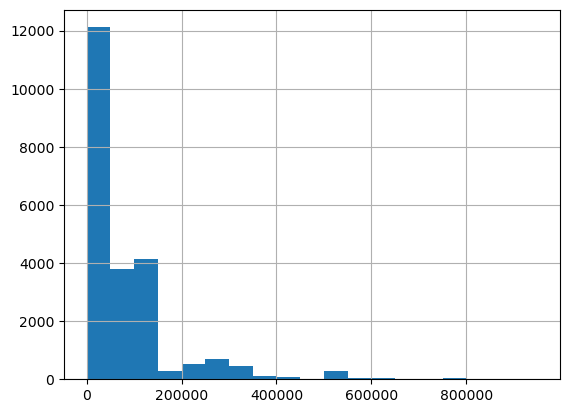

In [25]:
df[df["Net Attorney Fee"] < df["Net Attorney Fee"].quantile(.95)]["Total Coverage"].hist(bins=np.arange(0, 1e6, 50000));